### Exemple 02

Establishment and characterization of persistent *Pseudomonas aeruginosa* infections in air–liquid interface cultures of human airway epithelial cells.

doi: https://doi.org/10.1128/iai.00603-24

**Ref:** Bouheraoua S, Cleeves S, Preusse M, Müsken M, Braubach P, Fuchs M, Falk C, Sewald K, Häussler S. 2025. Establishment and characterization of persistent Pseudomonas aeruginosa infections in air–liquid interface cultures of human airway epithelial cells. Infect Immun 93:e00603-24.
https://doi.org/10.1128/iai.00603-24

- The exemple was done for the Calu-3 PAO1 Day 5 vs Inoculum

Obj: extract background and upregulated genes for functional enrichment analysis

In [1]:
!pip install git+https://github.com/lais-carvalho/ResPathExplorer.git

  Cloning https://github.com/lais-carvalho/ResPathExplorer.git to c:\users\álvaro magno\appdata\local\temp\pip-req-build-wstvrk8k
  Resolved https://github.com/lais-carvalho/ResPathExplorer.git to commit 5c4fb8790072bc069e7c30b384ea325d24a5dc44
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/lais-carvalho/ResPathExplorer.git 'C:\Users\Álvaro Magno\AppData\Local\Temp\pip-req-build-wstvrk8k'


In [2]:
## Check the installation
import os
os.listdir(r'D:\Programas\Lib\site-packages\ResPathExplorer')

['CARDAnalysis.py',
 'KeggAnalysis.py',
 'mapper_KeggFunctions.py',
 'rename_file.py',
 'save_df_as_html.py',
 'URL_pathway.py',
 'validate_color_code.py',
 'VFDBAnalysis.py',
 '__init__.py',
 '__pycache__']

#### Upregulated genes

In [3]:
from ResPathExplorer.KeggAnalysis import KeggAnalysis
org = "Pseudomonas aeruginosa PAO1"
GMT_file = "exemple_02.gmt"
exemple_02 = KeggAnalysis(organism_name = org, file_name_gmt= GMT_file, use_existing_gmt = True)

In [4]:
print(exemple_02.org)
print(exemple_02.organism)

pae
Pseudomonas aeruginosa PAO1


In [5]:
## Load general data

## Open upregulated genes ids
with open('upregulated_ex2.txt', 'r') as file:
    upregulated = [line.strip() for line in file if line.strip()]
print(len(upregulated))

## Open background genes ids
with open('background_ex2.txt', 'r') as file:
    background = [line.strip() for line in file if line.strip()]
print(len(background))

731
1469


- **KeggAnalysis**

In [6]:
exemple_02.enrichment_analysis(gene_list = upregulated,
            cutoff = 0.05,
            name_outdir = "enrichment_exemple02up",
            number_path = 10,
            name_results_file = "enrichment_exemple02up",
            genes_background = background)

✅ File renamed to: enrichment_exemple02up.txt
✅ File renamed to: enrichment_exemple02up.pdf


In [7]:
exemple_02.enrichment_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Pathway name
71,exemple_02.gmt,pae00920,18/20,0.000171,0.017279,7.638542,66.252109,PA3445;PA2600;PA0186;PA3936;PA3447;PA3937;PA24...,Sulfur metabolism


- **CARDAnalysis**

In [80]:
with open('upregulatedGName_ex2.txt', 'r') as file:
    genes = [line.strip() for line in file if line.strip()]
len(genes)

250

In [9]:
from ResPathExplorer.CARDAnalysis import CARDAnalysis
ARGsup = CARDAnalysis(genes_list = genes, has_CARDdata = True)

In [13]:
ARGsup.add_antibiotic_by_id(gene_id = "ARO:3003034", antibiotic = "aminoglycosides, fluoroquinolones, macrolides")
ARGsup.add_antibiotic_by_id(gene_id = "ARO:3007010", antibiotic = "fluoroquinolones")
ARGsup.add_antibiotic_by_id(gene_id = "ARO:3000010", antibiotic = "glycopeptides")
ARGsup.add_antibiotic_by_id(gene_id = "ARO:3004059", antibiotic = "macrolides, streptogramins")

In [14]:
dfARG_up = ARGsup.ARGdf
dfARG_up

,Gene Name,Matched Name,Gene ID,Description,Antibiotics,All Synonyms
0,mgtA,mgtA,ARO:3000462,"""A macrolide glycosyltransferase encoded by th...","erythromycin, tylosin, azithromycin, methymycin","mgt, mgtA"
1,MexF,MexF,ARO:3000804,"""MexF is the multidrug inner membrane transpor...",<NA>,MexF
2,MexE,MexE,ARO:3000803,"""MexE is the membrane fusion protein of the Me...",<NA>,MexE
3,ArmR,ArmR,ARO:3004056,"""ArmR, a 53-amino-acid antirepressor, alloster...",<NA>,ArmR
4,mexX,mexX,ARO:3003034,"""MexX is the membrane fusion protein of the Me...","aminoglycosides, fluoroquinolones, macrolides",mexX
5,norC,norC,ARO:3007010,"""NorC is a multidrug efflux pump in Staphyloco...",fluoroquinolones,norC
6,vanA,vanA,ARO:3000010,"""VanA is a D-Ala-D-Ala ligase homolog that syn...",glycopeptides,vanA
7,mexP,mexP,ARO:3003698,"""MexP is the membrane fusion protein of the Me...",<NA>,mexP
8,OprN,OprN,ARO:3000805,"""OprN is the outer membrane channel component ...",<NA>,OprN
9,MexR,MexR,ARO:3000506,"""MexR is the repressor of the MexRAB-OprM oper...",<NA>,"MexR, nalB"


In [15]:
from ResPathExplorer.save_df_as_html import save_df_as_html
save_df_as_html(dfARG_up, filename = "ARGs_up.html")

HTML file saved: ARGs_up.html


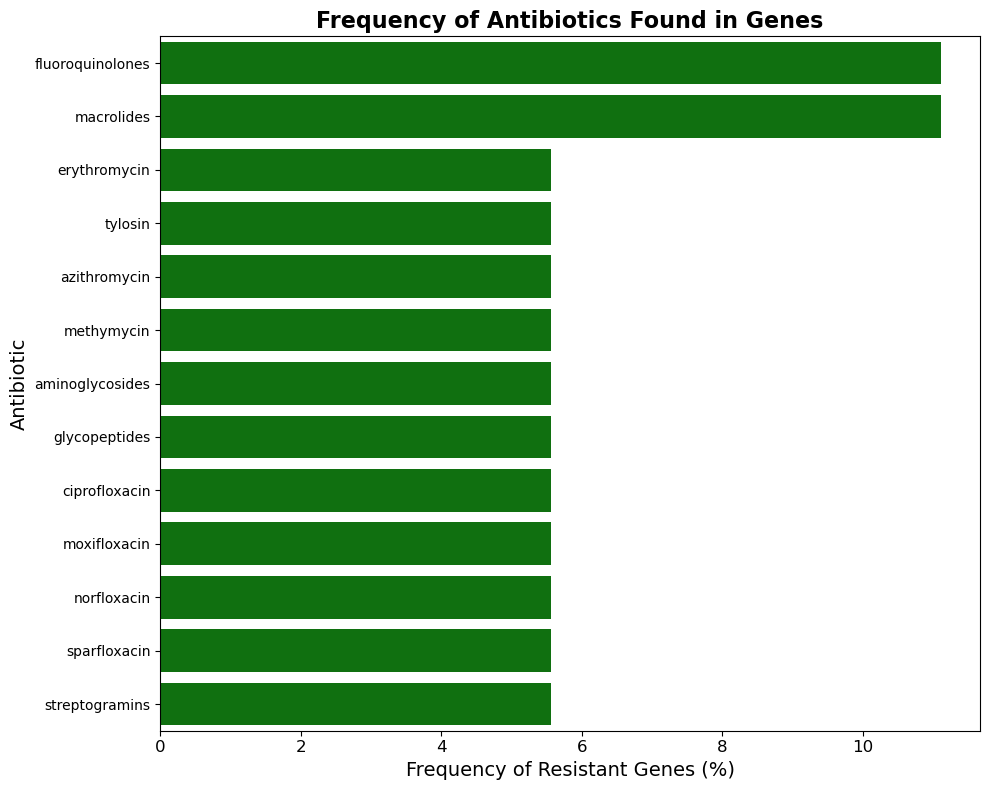

In [16]:
ARGsup.plot_antibiotic_frequencies(dfARG_up)

- **VFDBAnalysis**

In [78]:
from ResPathExplorer.VFDBAnalysis import VFDBAnalysis
VFsup = VFDBAnalysis(db_dir="vfdb_data")

In [79]:
df_genes = VFsup.load_and_process()

FASTA file already exists.
XLS file already exists.


In [81]:
bacteria_name = "Pseudomonas aeruginosa"

df_filtered = VFsup.search_virulence_genes(genes, bacteria_name)
df_filtered

,Gene_Name,Description,Functional category,Bacteria,VFID,VF_Name,Function
0,phzA2,phenazine biosynthesis protein PhzA,Nutritional/Metabolic factor,Pseudomonas aeruginosa PAO1,VF0100,Pyocyanin,Toxic to bacterial and eukaryotic cells due to...
1,phzB2,phenazine biosynthesis protein PhzB,Nutritional/Metabolic factor,Pseudomonas aeruginosa PAO1,VF0100,Pyocyanin,Toxic to bacterial and eukaryotic cells due to...
2,tse1,"type VI secretion system effector Tse1, peptid...",Effector delivery system,Pseudomonas aeruginosa PAO1,VF1194,HSI-1 T6SS secreted effectors,Tse1 (Amidase. Peptidoglycan degradation. ); T...
3,fapE,chaprone FapE,Adherence,Pseudomonas aeruginosa PAO1,VF1191,Fap,Mediates the initial attachment of bacteria to...
4,mucA,alkaline metalloproteinase precursor,Biofilm,Pseudomonas aeruginosa PAO1,VF0091,Alginate,Allows the bacteria form biofilm; contributes ...
5,algU,alginate biosynthesis protein AlgZ/FimS,Biofilm,Pseudomonas aeruginosa PAO1,VF0091,Alginate,Allows the bacteria form biofilm; contributes ...
6,phzG2,pyridoxamine 5'-phosphate oxidase,Nutritional/Metabolic factor,Pseudomonas aeruginosa PAO1,VF0100,Pyocyanin,Toxic to bacterial and eukaryotic cells due to...
7,pcrG,type III secretion system cytoplasmic regulato...,Effector delivery system,Pseudomonas aeruginosa PAO1,VF0083,TTSS,"Transports four known effector proteins: ExoS,..."
8,pscB,type III secretion system protein PscB,Effector delivery system,Pseudomonas aeruginosa PAO1,VF0083,TTSS,"Transports four known effector proteins: ExoS,..."
9,fapA,periplasmic accessory protein FapA,Adherence,Pseudomonas aeruginosa PAO1,VF1191,Fap,Mediates the initial attachment of bacteria to...


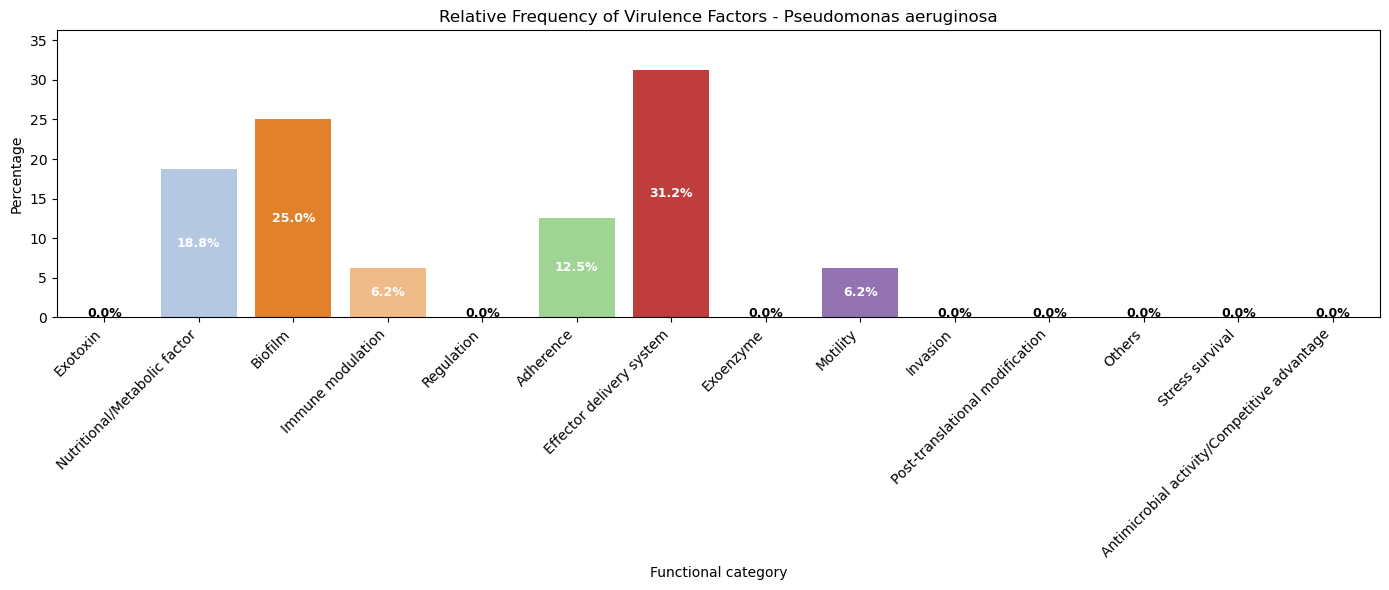

In [82]:
VFsup.plot_virulence_factors_percentage(df = df_filtered,
                                          bacteria_name = bacteria_name,
                                          show_all_categories = True)

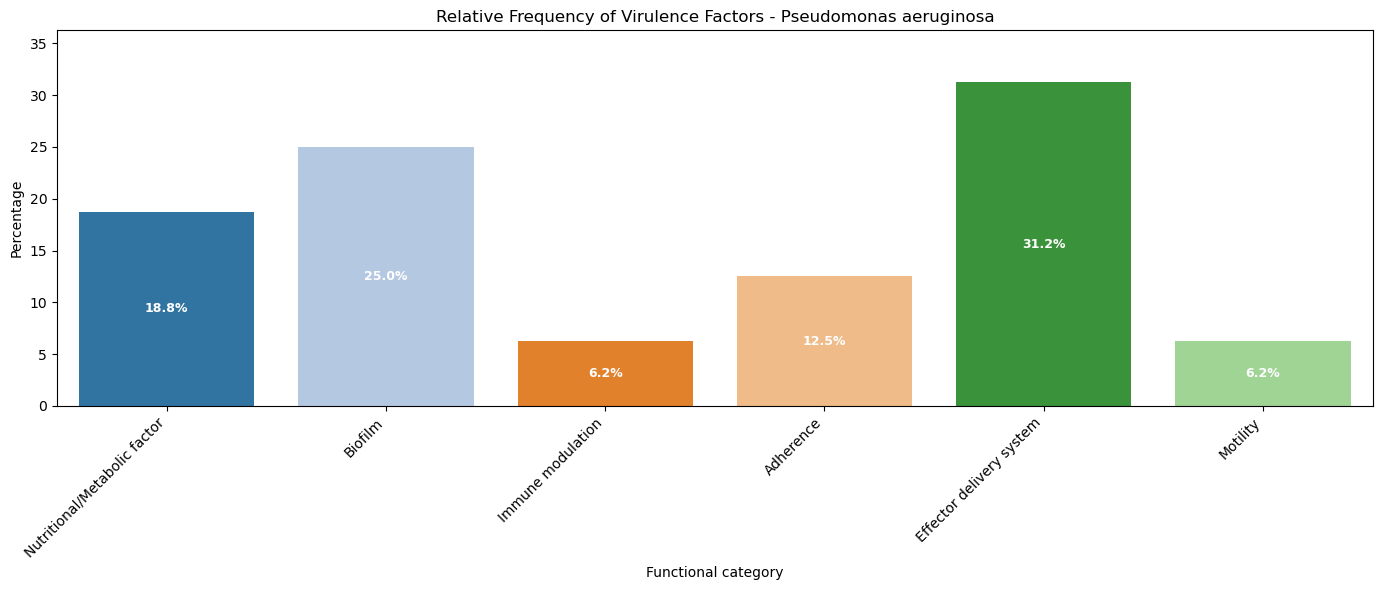

In [83]:
VFsup.plot_virulence_factors_percentage(df = df_filtered,
                                          bacteria_name = bacteria_name,
                                          show_all_categories = False)

- **URL_pathway**

In [43]:
import pandas as pd
df_up = pd.read_excel("df_genesup.xlsx")

In [44]:
df_up['Gene name'] = df_up['Gene name'].astype(str).str.strip()
df_filtered['Gene_Name'] = df_filtered['Gene_Name'].astype(str).str.strip()
dfARG_up['Matched Name'] = dfARG_up['Matched Name'].astype(str).str.strip().apply(lambda x: x[:1].lower() + x[1:] if x else x)


vf_genes = set(df_filtered['Gene_Name'])
arg_genes = set(dfARG_up['Matched Name'])


def get_color(gene):
    if gene in vf_genes:
        return "skyblue,purple"
    elif gene in arg_genes:
        return "indianred,blue"
    else:
        return "yellow,deeppink"

df_up['Color'] = df_up['Gene name'].apply(get_color)

In [45]:
df_up.head()

,Unnamed: 0,Locus Tag,Gene name,log2FC,FDR,Color
0,1,PA4096,nan,8.812327,1.715410e-04,"yellow,deeppink"
1,2,PA1541,nan,6.551870,7.010000e-06,"yellow,deeppink"
2,3,PA1540,nan,6.255027,1.980000e-06,"yellow,deeppink"
3,4,PA3391,nosR,5.743180,1.494840e-04,"yellow,deeppink"
4,5,PA5471,armZ,5.629825,2.600000e-07,"yellow,deeppink"


In [46]:
gene_color_dict = df_up.set_index('Locus Tag')['Color'].to_dict()
gene_color_dict

{'PA4096': 'yellow,deeppink',
 'PA1541': 'yellow,deeppink',
 'PA1540': 'yellow,deeppink',
 'PA3391': 'yellow,deeppink',
 'PA5471': 'yellow,deeppink',
 'PA2135': 'yellow,deeppink',
 'PA2260': 'yellow,deeppink',
 'PA2261': 'yellow,deeppink',
 'PA1427': 'yellow,deeppink',
 'PA0882': 'yellow,deeppink',
 'PA0612': 'yellow,deeppink',
 'PA3445': 'yellow,deeppink',
 'PA5470': 'yellow,deeppink',
 'PA3584': 'yellow,deeppink',
 'PA0805.1': 'yellow,deeppink',
 'PA3581': 'yellow,deeppink',
 'PA4130': 'yellow,deeppink',
 'PA1947': 'yellow,deeppink',
 'PA4131': 'yellow,deeppink',
 'PA5460': 'yellow,deeppink',
 'PA0711': 'yellow,deeppink',
 'PA2262': 'yellow,deeppink',
 'PA2214': 'yellow,deeppink',
 'PA4103': 'yellow,deeppink',
 'PA3718': 'yellow,deeppink',
 'PA0610': 'yellow,deeppink',
 'PA4825': 'indianred,blue',
 'PA2472': 'yellow,deeppink',
 'PA2022': 'yellow,deeppink',
 'PA3431': 'yellow,deeppink',
 'PA1981': 'yellow,deeppink',
 'PA2712': 'yellow,deeppink',
 'PA0738': 'yellow,deeppink',
 'PA1426'

In [47]:
term_list = []
for t in exemple_02.enrichment_results["Term"]:
    term_list.append(t)
term_list

['pae00920']

In [48]:
genes_er = []
for g in exemple_02.enrichment_results["Genes"]:
    for x in g.split(";"):
        genes_er.append(x)
genes_er

['PA3445',
 'PA2600',
 'PA0186',
 'PA3936',
 'PA3447',
 'PA3937',
 'PA2481',
 'PA4198',
 'PA2296',
 'PA3444',
 'PA3442',
 'PA3816',
 'PA4130',
 'PA3448',
 'PA3449',
 'PA3443',
 'PA0185',
 'PA3938']

In [50]:
from ResPathExplorer.URL_pathway import get_url_pathway
gene_set = exemple_02.gene_set

for t in term_list:
    genes_in_pathway = next(genes for (path_id, _), genes in gene_set.items() if path_id == t)

    filtered_gene_color_dict = {
        gene: gene_color_dict[gene]
        for gene in genes_in_pathway
        if gene in gene_color_dict
    }
    url = get_url_pathway(t, filtered_gene_color_dict)
    print(f"URL {t}:", url)

URL pae00920: http://www.kegg.jp/kegg-bin/show_pathway?pae00920/default%3dpink//PA0185%09yellow,deeppink//PA3936%09yellow,deeppink//PA3448%09yellow,deeppink//PA3938%09yellow,deeppink//PA3447%09yellow,deeppink//PA4130%09yellow,deeppink//PA3443%09yellow,deeppink//PA3445%09yellow,deeppink//PA2481%09yellow,deeppink//PA3816%09yellow,deeppink//PA0186%09yellow,deeppink//PA3442%09yellow,deeppink//PA3449%09yellow,deeppink//PA3444%09yellow,deeppink//PA2296%09yellow,deeppink//PA3937%09yellow,deeppink//PA4198%09yellow,deeppink//PA2600%09yellow,deeppink/


#### Downregulated genes

- **KeggAnalysis**

In [51]:
## Open upregulated genes ids
with open('downregulated_ex2.txt', 'r') as file:
    downregulated = [line.strip() for line in file if line.strip()]
print(len(downregulated))

## Open background genes ids
with open('background_ex2.txt', 'r') as file:
    background = [line.strip() for line in file if line.strip()]
print(len(background))

694
1469


In [52]:
exemple_02.enrichment_analysis(gene_list = downregulated,
            cutoff = 0.05,
            name_outdir = "enrichment_exemple02down",
            number_path = 10,
            name_results_file = "enrichment_exemple02down",
            genes_background = background)

✅ File renamed to: enrichment_exemple02down.txt
✅ File renamed to: enrichment_exemple02down.pdf


In [53]:
exemple_02.enrichment_results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Odds Ratio,Combined Score,Genes,Pathway name
82,exemple_02.gmt,pae02020,58/80,0.000002,0.000219,3.077926,40.043544,PA1342;PA2001;PA4547;PA1911;PA0412;PA3702;PA07...,Two-component system
86,exemple_02.gmt,pae02040,13/13,0.000055,0.002695,30.724138,301.344559,PA1105;PA1087;PA1460;PA1441;PA1085;PA1086;PA10...,Flagellar assembly


- **CARDAnalysis**

In [85]:
with open('downregulatedGName_ex2.txt', 'r') as file:
    genes = [line.strip() for line in file if line.strip()]
len(genes)

396

In [55]:
from ResPathExplorer.CARDAnalysis import CARDAnalysis
ARGsdown = CARDAnalysis(genes_list = genes, has_CARDdata = True)

In [58]:
ARGsdown.add_antibiotic_by_id(gene_id = "ARO:3003681", antibiotic = "triclosan")  # TriC
ARGsdown.add_antibiotic_by_id(gene_id = "ARO:3005064", antibiotic = "polymyxins")  # cprS
ARGsdown.add_antibiotic_by_id(gene_id = "ARO:3005069", antibiotic = "fluoroquinolones, diaminopyrimidines, phenicols")  # rsmA
ARGsdown.add_antibiotic_by_id(gene_id = "ARO:3000533", antibiotic = "macrolides")  # pvdR
ARGsdown.add_antibiotic_by_id(gene_id = "ARO:3000535", antibiotic = "macrolides")  # pvdT

In [60]:
dfARG_down = ARGsdown.ARGdf
dfARG_down

,Gene Name,Matched Name,Gene ID,Description,Antibiotics,All Synonyms
0,TriC,TriC,ARO:3003681,"""TriC is a resistance nodulation cell division...",triclosan,TriC
1,MexB,MexB,ARO:3000378,"""MexB is the inner membrane multidrug exporter...",<NA>,MexB
2,LptD,LptD,ARO:3005059,"""LptD is involved in LPS transport in a ABC Tr...","novobiocin, rifampin, imipenem, polymyxin B",LptD
3,OprM,OprM,ARO:3000379,"""OprM is an outer membrane factor protein foun...",<NA>,OprM
4,cprS,cprS,ARO:3005064,"""cprS is part of a two-component regulatory sy...",polymyxins,cprS
5,LpxD,LpxD,ARO:3003575,"""The LpxD gene is widely known to be involved ...","colistin A, colistin B",LpxD
6,LpxA,LpxA,ARO:3003573,"""The LpxA gene is widely known to be involved ...","colistin A, colistin B",LpxA
7,MvaT,MvaT,ARO:3004069,"""MvaT, a global regulator of virulence genes i...",<NA>,MvaT
8,rsmA,rsmA,ARO:3005069,"""rsmA is a gene that regulates virulence of Ps...","fluoroquinolones, diaminopyrimidines, phenicols","csrA, rsmA"
9,macA,pvdR,ARO:3000533,"""MacA is a membrane fusion protein that forms ...",macrolides,"macA, pvdR"


In [61]:
from ResPathExplorer.save_df_as_html import save_df_as_html
save_df_as_html(dfARG_down, filename = "ARGs_down.html")

HTML file saved: ARGs_down.html


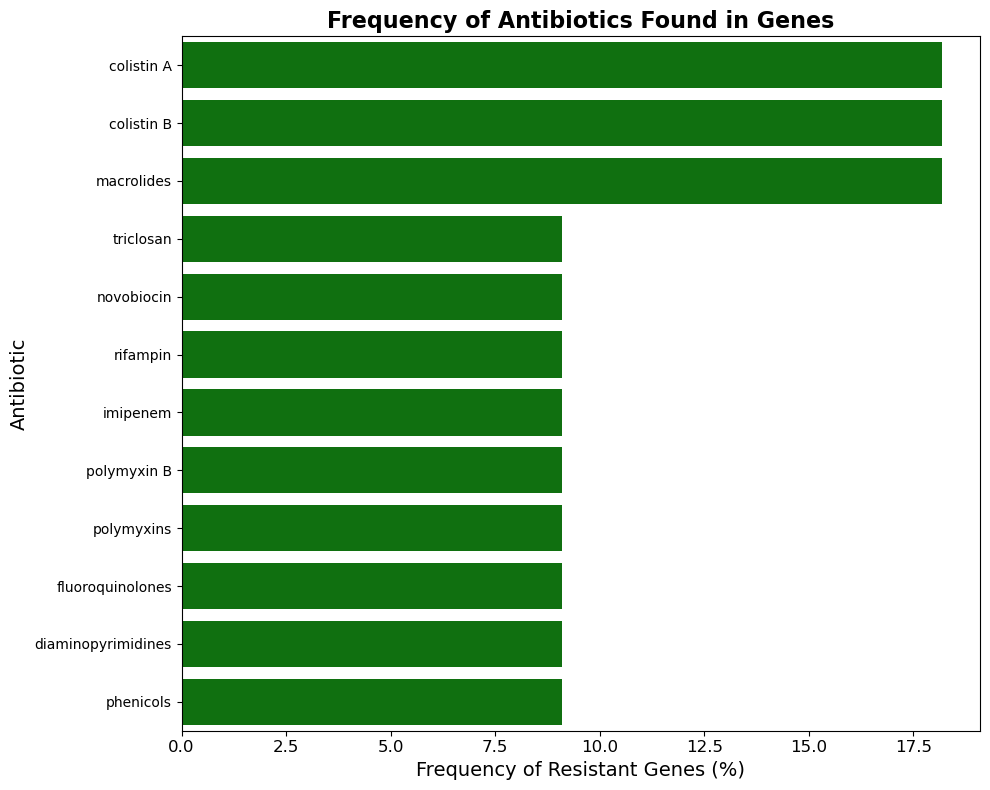

In [62]:
ARGsdown.plot_antibiotic_frequencies(dfARG_down)

- **VFDBAnalysis**

In [86]:
from ResPathExplorer.VFDBAnalysis import VFDBAnalysis
VFsdown = VFDBAnalysis(db_dir="vfdb_data")

In [87]:
df_genes = VFsdown.load_and_process()

FASTA file already exists.
XLS file already exists.


In [88]:
bacteria_name = "Pseudomonas aeruginosa"

df_filtered = VFsdown.search_virulence_genes(genes, bacteria_name)
df_filtered

,Gene_Name,Description,Functional category,Bacteria,VFID,VF_Name,Function
0,pilS,two-component sensor PilS,Adherence,Pseudomonas aeruginosa PAO1,VF0082,Type IV pili,"Attaches to host cells, but not to mucin, caus..."
1,pilZ,type 4 fimbrial biogenesis protein PilZ,Adherence,Pseudomonas aeruginosa PAO1,VF0082,Type IV pili,"Attaches to host cells, but not to mucin, caus..."
2,pilT,twitching motility protein PilT,Adherence,Pseudomonas aeruginosa PAO1,VF0082,Type IV pili,"Attaches to host cells, but not to mucin, caus..."
3,xcpQ,general secretion pathway protein D,Effector delivery system,Pseudomonas aeruginosa PAO1,VF0084,Xcp secretion system,Secretes toxins and enzymes into the extracell...
4,fliI,flagellum-specific ATP synthase FliI,Motility,Pseudomonas aeruginosa PAO1,VF0273,Flagella,Swimming motility; play a role in biofilm form...
...,...,...,...,...,...,...,...
59,pvdH,diaminobutyrate-2-oxoglutarate aminotransferas...,Nutritional/Metabolic factor,Pseudomonas aeruginosa PAO1,VF0094,Pyoverdine,Effective at acquiring iron from transferrin a...
60,pvdE,pyoverdine biosynthesis protein PvdE,Nutritional/Metabolic factor,Pseudomonas aeruginosa PAO1,VF0094,Pyoverdine,Effective at acquiring iron from transferrin a...
61,pvdN,pyoverdine biosynthesis protein PvdN,Nutritional/Metabolic factor,Pseudomonas aeruginosa PAO1,VF0094,Pyoverdine,Effective at acquiring iron from transferrin a...
62,fpvA,ferripyoverdine receptor FpvA,Nutritional/Metabolic factor,Pseudomonas aeruginosa PAO1,VF0094,Pyoverdine,Effective at acquiring iron from transferrin a...


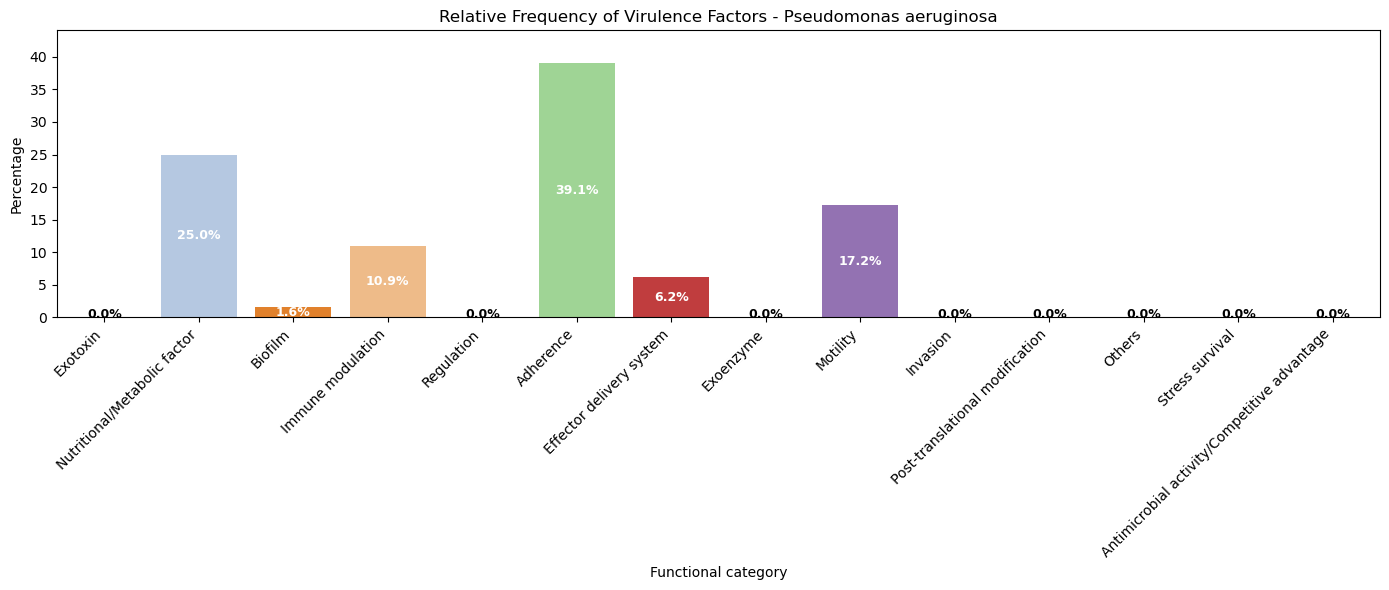

In [67]:
VFsdown.plot_virulence_factors_percentage(df = df_filtered,
                                          bacteria_name = bacteria_name,
                                          show_all_categories = True)

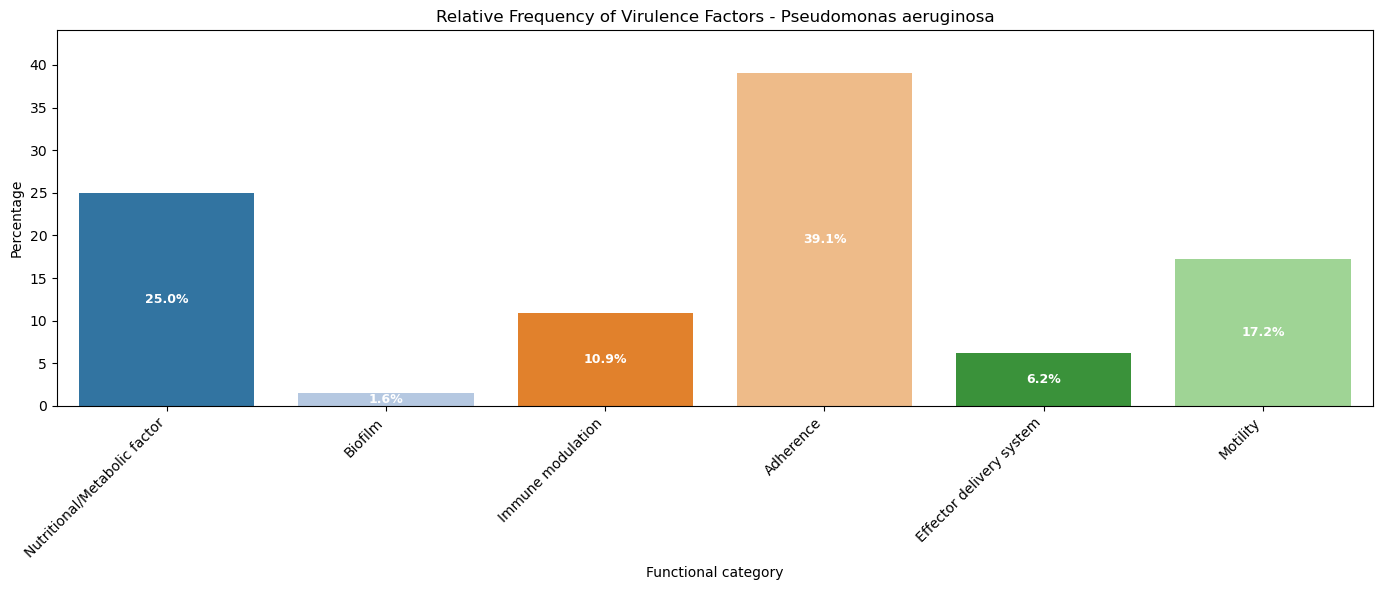

In [75]:
VFsdown.plot_virulence_factors_percentage(df = df_filtered,
                                          bacteria_name = bacteria_name,
                                          show_all_categories = False)

In [89]:
from ResPathExplorer.save_df_as_html import save_df_as_html
save_df_as_html(df_filtered, filename = "VFGs_down.html")

HTML file saved: VFGs_down.html


- **URL_pathway**

In [69]:
import pandas as pd
df_down = pd.read_excel("df_genesdown.xlsx")

In [70]:
df_down['Gene name'] = df_down['Gene name'].astype(str).str.strip()
df_filtered['Gene_Name'] = df_filtered['Gene_Name'].astype(str).str.strip()
dfARG_down['Matched Name'] = dfARG_down['Matched Name'].astype(str).str.strip().apply(lambda x: x[:1].lower() + x[1:] if x else x)


vf_genes = set(df_filtered['Gene_Name'])
arg_genes = set(dfARG_down['Matched Name'])


def get_color(gene):
    if gene in vf_genes:
        return "skyblue,purple"
    elif gene in arg_genes:
        return "indianred,blue"
    else:
        return "yellow,deeppink"

df_down['Color'] = df_down['Gene name'].apply(get_color)

In [71]:
df_down.head()

,Unnamed: 0,Locus Tag,Gene name,log2FC,FDR,Color
0,776,PA0750,ung,-1.003620,0.022402,"yellow,deeppink"
1,777,PA0344,nan,-1.007147,0.040282,"yellow,deeppink"
2,778,PA4048,nan,-1.012717,0.023763,"yellow,deeppink"
3,779,PA4546,pilS,-1.014871,0.023626,"skyblue,purple"
4,780,PA3686,adk,-1.017409,0.024234,"yellow,deeppink"


In [72]:
gene_color_dict = df_down.set_index('Locus Tag')['Color'].to_dict()
gene_color_dict

{'PA0750': 'yellow,deeppink',
 'PA0344': 'yellow,deeppink',
 'PA4048': 'yellow,deeppink',
 'PA4546': 'skyblue,purple',
 'PA3686': 'yellow,deeppink',
 'PA5006': 'yellow,deeppink',
 'PA2668': 'yellow,deeppink',
 'PA4796': 'yellow,deeppink',
 'PA4946': 'yellow,deeppink',
 'PA3768': 'yellow,deeppink',
 'PA4389': 'yellow,deeppink',
 'PA2611': 'yellow,deeppink',
 'PA4558': 'yellow,deeppink',
 'PA1823': 'yellow,deeppink',
 'PA2960': 'skyblue,purple',
 'PA1597': 'yellow,deeppink',
 'PA1033': 'yellow,deeppink',
 'PA0395': 'skyblue,purple',
 'PA3735': 'yellow,deeppink',
 'PA3611': 'yellow,deeppink',
 'PA5003': 'yellow,deeppink',
 'PA3001': 'yellow,deeppink',
 'PA0659': 'yellow,deeppink',
 'PA0168': 'yellow,deeppink',
 'PA5455': 'yellow,deeppink',
 'PA3804': 'yellow,deeppink',
 'PA3105': 'skyblue,purple',
 'PA5551': 'yellow,deeppink',
 'PA3737': 'yellow,deeppink',
 'PA3110': 'yellow,deeppink',
 'PA3864': 'yellow,deeppink',
 'PA4941': 'yellow,deeppink',
 'PA3224': 'yellow,deeppink',
 'PA1181': 'ye

In [73]:
term_list = []
for t in exemple_02.enrichment_results["Term"]:
    term_list.append(t)
term_list

['pae02020', 'pae02040']

In [74]:
from ResPathExplorer.URL_pathway import get_url_pathway
gene_set = exemple_02.gene_set

for t in term_list:
    genes_in_pathway = next(genes for (path_id, _), genes in gene_set.items() if path_id == t)

    filtered_gene_color_dict = {
        gene: gene_color_dict[gene]
        for gene in genes_in_pathway
        if gene in gene_color_dict
    }
    url = get_url_pathway(t, filtered_gene_color_dict)
    print(f"URL {t}:", url)

URL pae02020: http://www.kegg.jp/kegg-bin/show_pathway?pae02020/default%3dpink//PA1912%09yellow,deeppink//PA0413%09skyblue,purple//PA2824%09yellow,deeppink//PA2468%09yellow,deeppink//PA3900%09yellow,deeppink//PA0150%09yellow,deeppink//PA0411%09skyblue,purple//PA1340%09yellow,deeppink//PA3409%09yellow,deeppink//PA0930%09yellow,deeppink//PA3705%09yellow,deeppink//PA4547%09skyblue,purple//PA0931%09yellow,deeppink//PA0414%09skyblue,purple//PA0905%09indianred,blue//PA1336%09yellow,deeppink//PA2688%09yellow,deeppink//PA0415%09skyblue,purple//PA2686%09yellow,deeppink//PA5508%09yellow,deeppink//PA4310%09yellow,deeppink//PA5168%09yellow,deeppink//PA1459%09yellow,deeppink//PA3704%09yellow,deeppink//PA0471%09yellow,deeppink//PA1337%09yellow,deeppink//PA4309%09yellow,deeppink//PA2467%09yellow,deeppink//PA2553%09yellow,deeppink//PA0296%09yellow,deeppink//PA0409%09skyblue,purple//PA4546%09skyblue,purple//PA2687%09yellow,deeppink//PA0652%09skyblue,purple//PA2001%09yellow,deeppink//PA4895%09yellow,dee